<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

# CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

# Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:

from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix


In [3]:
# import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical


In [4]:
from keras.callbacks import TensorBoard
import datetime, os

# Load data
Use the **Keras**' load method.

In [5]:
# insert code here
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

## Check some data

[9]


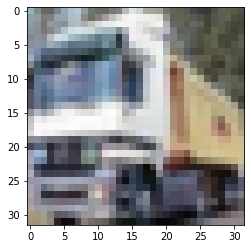

In [6]:
# insert code here
print(y_train[1])
plt.imshow(x_train[1])

In [7]:
type(y_test)

numpy.ndarray

## Prepare data

In [8]:
# insert code here
y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
uniq = len(set(y_train.flatten()))
uniq

10

In [11]:
y_train = to_categorical(
    y_train,
    num_classes = len(set(y_train.flatten())),
    dtype = 'uint8')

In [12]:
y_test = to_categorical(
    y_test,
    num_classes = len(set(y_test.flatten())),
    dtype = 'uint8')

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
img_rows=x_train[0].shape[0]
img_cols=x_test[0].shape[1]
print(img_rows,img_cols)

32 32


In [15]:
X_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,3)

X_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,3)

# Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [16]:
# insert code here
model = Sequential()

2022-03-12 18:01:40.037946: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile the model

In [17]:
# insert code here
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_test[0].shape

(32, 32, 3)

In [19]:
# insert code here
model.add(Conv2D(filters=60,
                 kernel_size = 5,
                 activation = 'relu',
                 data_format = 'channels_last',
                 padding = 'valid',
                 input_shape = (32, 32, 3)))

# Add another convolutional layer
model.add(Conv2D(45,
                 kernel_size = 2,
                 activation = 'sigmoid'))

# Flatten the output of the convolutional layer
model.add(Flatten())

# Add an output layer for the 10 categories
model.add(Dense(uniq,
                activation = 'softmax'))

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        4560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 45)        10845     
_________________________________________________________________
flatten (Flatten)            (None, 32805)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                328060    
Total params: 343,465
Trainable params: 343,465
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
vgg16_model = tf.keras.applications.VGG16(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None,
    classifier_activation="softmax",
)

In [31]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [32]:
x_train_vgg =tf.keras.applications.vgg16.preprocess_input(
    x_train, data_format=None
)

# Fit the training data

In [33]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

2022-03-12 18:04:09.018733: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-12 18:04:09.018793: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-12 18:04:09.020456: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [34]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [35]:
%%time
# insert code here
fitted_model = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    epochs = 4,
    batch_size = 10,
    callbacks = [tensorboard]
)


# ..., callbacks = [tensorboard], ...

Epoch 1/4
   6/4000 [..............................] - ETA: 2:01 - loss: 12.6392 - accuracy: 0.0600   

2022-03-12 18:04:41.652211: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-03-12 18:04:41.652225: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-03-12 18:04:41.676696: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-03-12 18:04:41.684605: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-03-12 18:04:41.705955: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2022_03_12_18_04_41
2022-03-12 18:04:41.706453: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_12_18_04_41/Huangs-Air.trace.json.gz
2022-03-12 18:04:41.714382: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2022_03_12_18_04_41
2022-03-12 18:04:41.714589: I ten

4000/4000 [==============================] - 86s 22ms/step - loss: 2.6029 - accuracy: 0.1583 - val_loss: 1.7605 - val_accuracy: 0.3555
Epoch 2/4
4000/4000 [==============================] - 96s 24ms/step - loss: 1.7013 - accuracy: 0.3964 - val_loss: 1.7395 - val_accuracy: 0.3853
Epoch 3/4
4000/4000 [==============================] - 98s 24ms/step - loss: 1.6571 - accuracy: 0.4154 - val_loss: 1.7219 - val_accuracy: 0.3935
Epoch 4/4
4000/4000 [==============================] - 99s 25ms/step - loss: 1.5784 - accuracy: 0.4409 - val_loss: 1.7275 - val_accuracy: 0.3767
CPU times: user 35min 40s, sys: 32.2 s, total: 36min 12s
Wall time: 6min 19s


### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [36]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with -4).

# Create predictions

In [37]:
%%time
predictions = model.predict_classes(X_test)

/Users/anna_hj/opt/anaconda3/envs/IOD-deep-learning/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


CPU times: user 42.7 s, sys: 363 ms, total: 43 s
Wall time: 7.27 s


# Evaluate the model

In [38]:
# insert code here
score = model.evaluate(x_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 8s 8ms/step - loss: 1.7320 - accuracy: 0.3746

Test loss: 1.731989, Test accuracy: 0.374600


In [39]:
predictions

array([3, 9, 8, ..., 5, 6, 7])

# Visualisation of cost

# Results

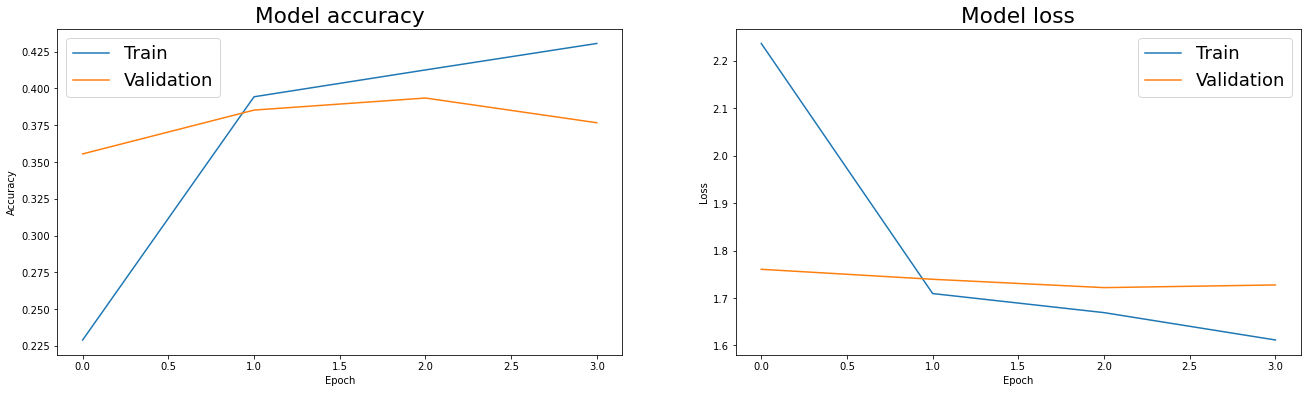

In [40]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['accuracy'])
ax[0].plot(fitted_model.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'])
ax[1].plot(fitted_model.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

# Save and Load models and weights

## Save

## Load

In [28]:
# insert code here

© 2020 Institute of Data